In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df=pd.read_csv(r"E:\github\data science\data-science\Machine Learning\drug200.csv")
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
col=['Sex','BP','Cholesterol','Drug']
for c in col:
    df[c]=lb.fit_transform(df[c])
df.head(3)    

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2


In [6]:
x=df.drop('Drug',axis=1)
y=df['Drug']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)


In [11]:
from sklearn.metrics import classification_report

tr=DecisionTreeClassifier()
tr.fit(x_train,y_train)
pred=tr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred))
print("classification_report",classification_report(y_test,pred))

Accuracy: 1.0
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



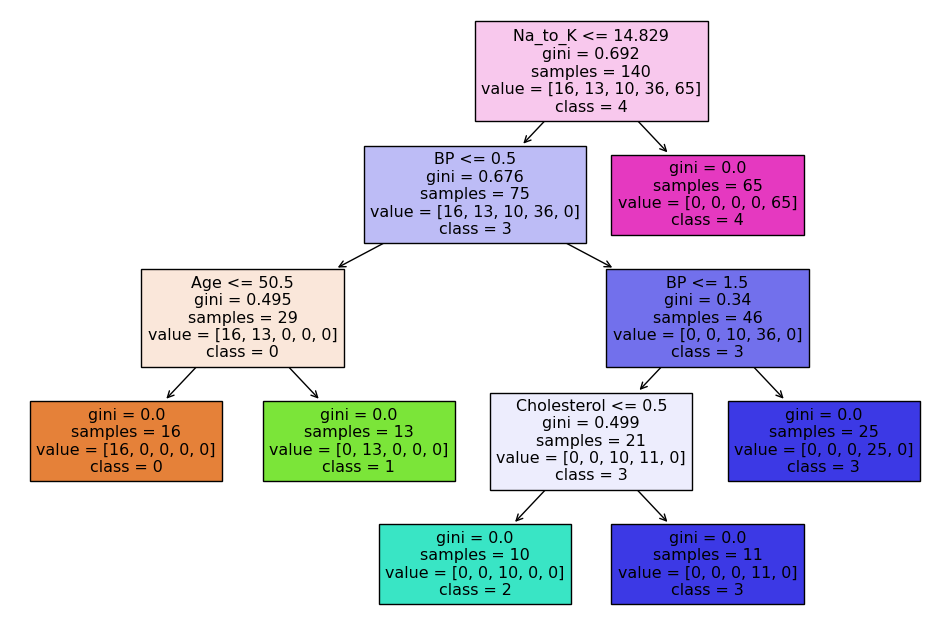

In [15]:
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 8))
plot_tree(
    tr,
    filled=True,
    feature_names=x.columns,
    class_names=[str(c) for c in lb.classes_]  # Convert to strings
)
plt.show()
